# STAT207 Final Project - Analysis on the Reception of Video Games through Steam Data

#### Afnan Dzaharudin (afnanfd2)

## 1. Introduction

Steam is one of the largest gaming platforms online primarily for PC-gaming (that being said, there are certainly a large number of games _not_ hosted on Steam, that are still highly popular). That makes Steam an excellent source of information about PC games.

By combining categorical data from [a dataset from Kaggle](https://www.kaggle.com/nikdavis/steam-store-games) and current numerical data from [SteamSpy, a Steam statistics service](https://steamspy.com/), I have created a dataset with a large number of variables we can work with.

This research project aims to find relationships that hint towards whether a game is generally likeable or playable or not, and what variables explain this relationship.

### 1.1 Setup

We import the primary libraries needed in this project. More will be imported as needed later.

Some clean-up is done to make sure some of the variables in the dataset behave better with functions, and some additional variables are added.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("samplesteam.csv")

# Format the "owners" column to have an order

owner_order = ['100,000 - 200,000',
               '200,000 - 500,000',
               '500,000 - 1,000,000',
               '1,000,000 - 2,000,000',
               '2,000,000 - 5,000,000',
               '5,000,000 - 10,000,000',
               '10,000,000 - 20,000,000',
               '20,000,000 - 50,000,000',
               '50,000,000 - 100,000,000',
               '100,000,000 - 200,000,000']

df["owners"] = pd.Categorical(df["owners"], owner_order)

# Convert "release_date" to a datetime format

df["release_date"] = pd.to_datetime(df["release_date"])

df["is_multiplayer"] = df["categories"].str.contains("multi-player", case=False)
df["is_indie"] = df["genres"].str.contains("indie", case=False)
df["release_year"] = pd.DatetimeIndex(df["release_date"]).year


The dataset can be seen below:

In [3]:
df.head()

,appid,name,release_date,developer,publisher,positive_reviews,negative_reviews,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,ccu,english,categories,genres,is_multiplayer,is_indie,release_year
0,396710,The Adventure Pals,2018-04-03,Massive Monster,Armor Games Studios,1205,98,"200,000 - 500,000",418,0,793,0,14.99,10,1,Single-player;Local Co-op;Shared/Split Screen;...,Action;Adventure;Indie;RPG,False,True,2018
1,47700,Command & Conquer 4: Tiberian Twilight,2010-03-18,EA Los Angeles,Electronic Arts,531,2465,"200,000 - 500,000",514,0,312,0,0.00,5,1,Single-player;Multi-player,Strategy,True,False,2010
2,244930,SNOW - The Ultimate Edition,2019-02-14,"Poppermost Productions, WastedStudios, Crytek",Crytek,7942,4153,"1,000,000 - 2,000,000",135,0,27,0,14.99,15,1,Single-player;Multi-player;Online Multi-Player...,Free to Play;Indie;Simulation;Sports,True,True,2019
3,308040,Back to Bed,2014-08-06,Bedtime Digital Games,Bedtime Digital Games,1957,451,"1,000,000 - 2,000,000",198,0,200,0,5.99,3,1,Single-player;Steam Achievements;Full controll...,Action;Casual;Indie,False,True,2014
4,825310,Dude Simulator 2,2018-07-27,Kiddy,Kiddy,887,785,"200,000 - 500,000",41,0,48,0,4.99,2,1,Single-player;Steam Trading Cards,Action;Adventure;Indie;Racing;Simulation,False,True,2018


## 2. Descriptive Analytics

### 2.1 Relationship between Concurrent Users & the Categories of a Game

I'm a fan of indie games (games developed by individuals or smaller teams) for their tendency to be more unique and creative in design. I also play a fair share of single-player and multiplayer games. Is there a relationship between the concurrent users of a game and these two variables?

Due to the existence of large outliers in the CCU (concurrent users) value, the scaling of the plots have been stretched drastically, as seen below:

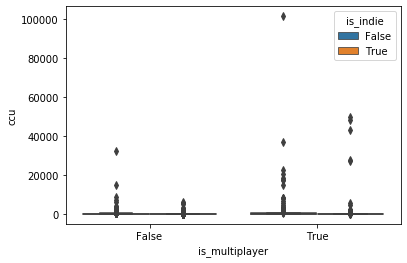

In [4]:
sns.boxplot(data=df, y="ccu", x="is_multiplayer", hue="is_indie")


We can remedy this problem by transforming CCU (Concurrent users) by adding 1 (to remove zeros), then taking their logarithm.

We get a much more readable, and informative, plot:

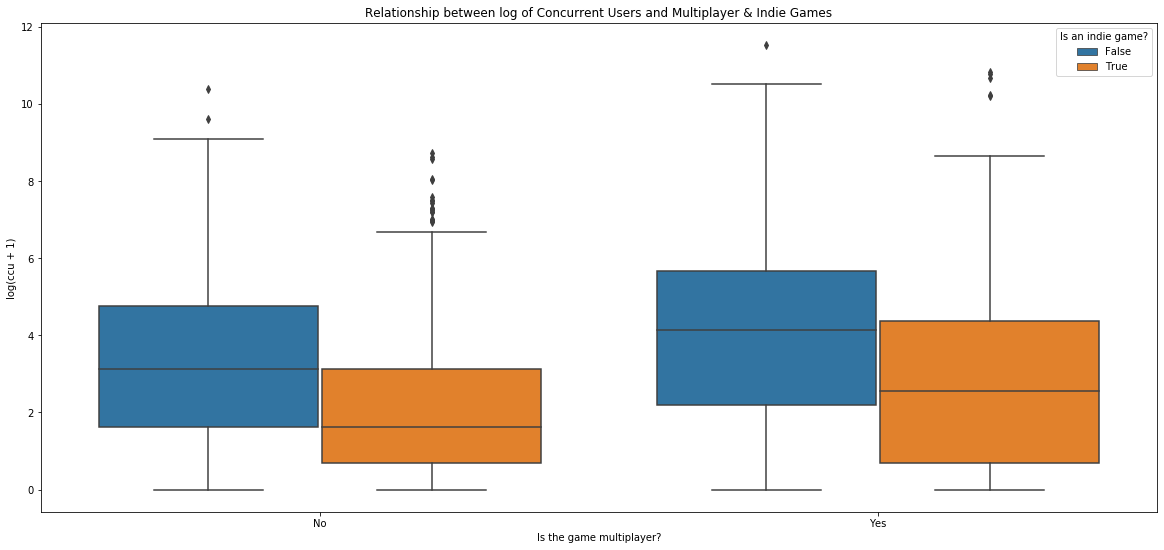

In [5]:
plt.figure(figsize=(20, 9))
df["ccu_log"] = np.log(df["ccu"] + 1)
sns.boxplot(data=df, y="ccu_log", x="is_multiplayer", hue="is_indie")

plt.xlabel("Is the game multiplayer?")
plt.xticks([0, 1], ["No", "Yes"])

plt.legend(title="Is an indie game?")

plt.ylabel("log(ccu + 1)")

plt.title("Relationship between log of Concurrent Users and Multiplayer & Indie Games")

plt.show()

There does seem to be a relationship between the concurrent players of a game and whether that game is multiplayer and/or indie!

First, multiplayer games have a slightly higher number of concurrent users than single-player (non-multiplayer) games.

Then, indie games in both categories tend to have less concurrent users than their non-indie counterparts.

We can look directly at the data to confirm this:

In [6]:
print("Showing the mean log CCus by multiplayer and indie games")
df[["ccu_log", "is_multiplayer", "is_indie"]].groupby(["is_multiplayer", "is_indie"]).mean()


Showing the mean log CCus by multiplayer and indie games


ccu_log
is_multiplayer is_indie          
False          False     3.294803
               True      2.136801
True           False     4.117114
               True      2.889345

Though we should still be careful, as the plot does contain only positive outliers on all categories. We can instead look at the median for each category:

In [7]:
print("Showing the median log CCus by multiplayer and indie games")
df[["ccu_log", "is_multiplayer", "is_indie"]].groupby(["is_multiplayer", "is_indie"]).median()


Showing the median log CCus by multiplayer and indie games


ccu_log
is_multiplayer is_indie          
False          False     3.135494
               True      1.609438
True           False     4.143135
               True      2.564949

They tell as similar tale as the means, though with somewhat larger differences. Non-indie multiplayer games have the highest median log CCU, followed by singleplayer non-indie games, then multiplayer indie games, then finally singleplayer non-indie games.

How much does this data vary? We can measure this by their standard deviation:

In [8]:
print("Showing the std of log CCus by multiplayer and indie games")
df[["ccu_log", "is_multiplayer", "is_indie"]].groupby(["is_multiplayer", "is_indie"]).std()


Showing the std of log CCus by multiplayer and indie games


ccu_log
is_multiplayer is_indie          
False          False     2.202848
               True      1.844793
True           False     2.427851
               True      2.493471

### 2.2 Conclusion

There exists a relationship between the concurrent players of a game and whether that game is multiplayer and/or indie: Multiplayer games have slightly more concurrent players, and non-indie games have more concurrent players than their counterpart. The variance of concurrent players is higher for multi-player games and is lower for non-multiplayer games.

## 3. Inference

Another thing we can look at is the difference in reception towards free-to-play games and paid games. Steam allows players to review the games they have played, either giving a positive or negative review and their written opinions for public view.

What I want to ask is: between free-to-play and paid games, is there a difference in whether those games are rated positively or not?

### 3.1: Overall Ratings of Free-to-play & Paid Games

Do free-to-play games get rated more positively than paid games?

$H_0: p_\text{positively rated free games} - p_\text{positively rated paid games} = 0$

$H_A: p_\text{positively rated free games} - p_\text{positively rated paid games} \ne 0$

### 3.2 Conditions

* $ n_\text{paid}(p_\text{paid}) \ge 10 $
* $ n_\text{paid}(1 - p_\text{paid}) \ge 10 $

* $ n_\text{free}(p_\text{free}) \ge 10 $
* $ n_\text{free}(1 - p_\text{free}) \ge 10 $

These are met.


* $ n_\text{paid-sample} < 10\% * n_\text{paid-population} $
* $ n_\text{free-sample} < 10\% * n_\text{free-population} $

Without looking up the actual numbers, we can assume these conditions are met. The dataset itself (the combination of paid and free games) is much less than 10% of all existing PC games.


* All observations are independent

The data has been randomly sampled from a non-random dataset (which is still smaller than the population that is all PC games).

All conditions are met.

### 3.3 Setup

First, we need to decide on a threshold on whether a game is negatively-reviewed or not. $0.5$ is certainly not it in this case- if half the playerbase hates the game and the other half likes it, one would not perceive that game as well-received (Steam labels these games as Mixed; I will consider Mixed as a negative review proportion).

[Looking it up only gave me this old result](https://www.gamedeveloper.com/business/fixing-steam-s-user-rating-charts), but I believe we can use it. It seems that 'Mostly Positive' starts at 70%, so we will let that be the threshold for a positively-reviewed game.

In [9]:
df["percentage_positive_reviews"] = df["positive_reviews"] / (df["positive_reviews"] + df["negative_reviews"])

df["is_positively_reviewed"] = df["percentage_positive_reviews"] >= 0.69
df["is_positively_reviewed"] = df["is_positively_reviewed"].map({True: 1, False: 0})

sample_free = df[df["price"] == 0]
sample_paid = df[df["price"] != 0]


In [10]:
prop_free_positive = np.mean(sample_free["is_positively_reviewed"])
prop_paid_positive = np.mean(sample_paid["is_positively_reviewed"])

prop_free_positive, prop_paid_positive

(0.6620689655172414, 0.7900826446280992)

### 3.4 Test Statistic

We can calculate the test statistic for this hypothesis test.

In [11]:
sample_diff = prop_free_positive - prop_paid_positive
sample_std = ((prop_free_positive * (1 - prop_free_positive) / sample_free.shape[0])
              + (prop_paid_positive * (1 - prop_paid_positive) / sample_paid.shape[0]))**0.5

z_stat = (sample_diff - 0) / sample_std
z_stat


-4.2469663193292195

In [12]:
from scipy.stats import norm

p_value = 2 * norm.cdf(z_stat)
p_value


2.1668451810872935e-05

### 3.5 Conclusion

At a significance value of $\alpha=0.01$, the p-value is lesser than this value. We can reject the null hypothesis in favor of the alternative:

In our dataset, there exists a significant difference in the proportion of free games that are positively-reviewed and the proportion of paid games that are positively-reviewed.

## 4. Linear Regression

### 4.1 Introduction

One way we could measure the popularity of a game is by observing how many concurrent players a game has. The more there are users playing at a given time, the more popular that game is.

The first research question is: **in our dataset**, is there a relationship between the CCU (concurrent users) of a game is and that game's number of owners, its release date, its reviews' positivity, its all-time median playtime, its median playtime in the past 2 weeks, whether it's a multiplayer game, and whether it's an indie game (a game developed by individuals or smaller teams)?

By answering the first research question we can get an insight to the second: Does the above also hold for **all Steam games**?

### 4.2 Setup

First, we import some additional libaries necessary for modelling the data.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split


`positive_reviews` and `negative_reviews` have been found to have a high correlation, but they may still be useful data, so we 'combine' the two variables into observations of the percentage of positive reviews a game has.

In [14]:
df[["positive_reviews", "negative_reviews"]].corr()


,positive_reviews,negative_reviews
positive_reviews,1.00000,0.74537
negative_reviews,0.74537,1.00000


In [15]:
df["percentage_positive_reviews"] = df["positive_reviews"] / (df["positive_reviews"] + df["negative_reviews"])

df.head()[["name", "positive_reviews", "negative_reviews", "percentage_positive_reviews"]]


,name,positive_reviews,negative_reviews,percentage_positive_reviews
0,The Adventure Pals,1205,98,0.924789
1,Command & Conquer 4: Tiberian Twilight,531,2465,0.177236
2,SNOW - The Ultimate Edition,7942,4153,0.656635
3,Back to Bed,1957,451,0.812708
4,Dude Simulator 2,887,785,0.530502


We split the dataset 90/10 for training/testing respectfully.

In [16]:
train, test = train_test_split(df, train_size=0.1, random_state=1096)

First contact: we attempt to fit the model with all the desired variables, without transforming any of them.

The R-squared value of the model is suspiciously high, yet a good number of the explanatory variables' slopes have somewhat high p-values.

In [17]:
# Try unchanged

ols_formula = "ccu ~ owners + release_year + percentage_positive_reviews + median_forever + median_2weeks + is_multiplayer + is_indie"

ols_model = smf.ols(data=train, formula=ols_formula).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccu   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1491.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.57e-138
Time:                        16:25:26   Log-Likelihood:                -1179.6
No. Observations:                 148   AIC:                             2387.
Df Residuals:                     134   BIC:                             2429.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            6843.5549   3.92e+04      0.175      0.862   -7.07e+04    8.44e+04
owners[T.200,000 - 500,000]            86.0885    147.551      0.583      0.561    -205.742     377.919
owners[T.500,000 - 1,000,000]         -68.1209    188.901     -0.361      0.719    -441.734     305.492
owners[T.1,000,000 - 2,000,000]       477.3368    248.013      1.925      0.056     -13.190     967.864
owners[T.2,000,000 - 5,000,000]     -1293.2069    365.858     -3.535      0.001   -2016.809    -569.605
owners[T.5,000,000 - 10,000,000]     1115.6334    573.571      1.945      0.054     -18.789    2250.056
owners[T.10,000,000 - 20,000,000]    3154.1664    538.740      5.855      0.000    2088.633    4219.700
owners[T.20,000,000 - 50,000,000]    1.006e+05    804.035    125.098      0.000     9.9e+04    1.02e+05
owners[T.50,000,000 - 100,000,000]    -1.5e-11   1.49e-10     -0.101      0.920    -3.1e-10     2.8e-10
owners[T.100,000,000 - 200,000,000]  2.211e-11   2.05e-11      1.077      0.283   -1.85e-11    6.27e-11
is_multiplayer[T.True]                133.3694    138.160      0.965      0.336    -139.888     406.627
is_indie[T.True]                       38.7132    131.592      0.294      0.769    -221.552     298.978
release_year                           -3.3969     19.468     -0.174      0.862     -41.901      35.107
percentage_positive_reviews          -113.6836    388.521     -0.293      0.770    -882.110     654.743
median_forever                          0.0709      0.054      1.314      0.191      -0.036       0.178
median_2weeks                           2.6022      0.157     16.606      0.000       2.292       2.912
==============================================================================
Omnibus:                      106.344   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3879.994
Skew:                          -1.890   Prob(JB):                         0.00
Kurtosis:                      27.797   Cond. No.                     5.32e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Extreme values existed on all these plots such that most of them had to be 'zoomed into' to better-see the distribution of points. This, plus the fact that the residuals and predicted values mostly lie underneath their lines, indicate a skewness due to one or more variables. We proceed to look into this.

Extremely large outliers have drastically stretched the scale of the plots. For the sake of visibility, the scales have been fixed, excluding those outliers but making most of the points more visible.


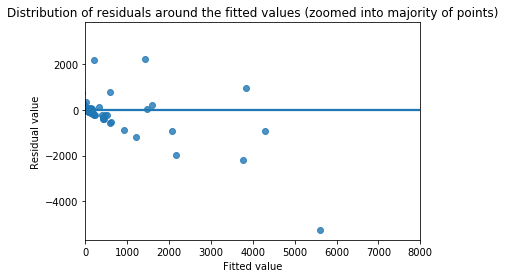

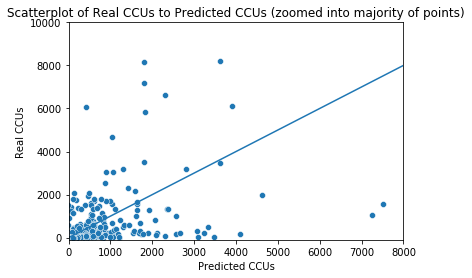

Mean error: 109.4112209666126


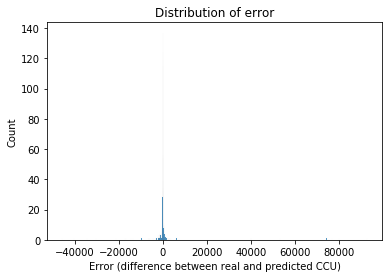

In [18]:
y_predict = ols_model.predict(test)
y_real = test["ccu"]

print("Extremely large outliers have drastically stretched the scale of the plots. For the sake of visibility, the scales have been fixed, excluding those outliers but making most of the points more visible.")

sns.regplot(x=ols_model.fittedvalues, y=ols_model.resid, ci=None)
plt.title("Distribution of residuals around the fitted values (zoomed into majority of points)")
plt.xlim([0, 8000])
plt.ylabel("Residual value")
plt.xlabel("Fitted value")
plt.show()

sns.scatterplot(x=y_predict, y=y_real)
plt.plot([0, max(y_real)], [0, max(y_real)])
plt.title("Scatterplot of Real CCUs to Predicted CCUs (zoomed into majority of points)")
plt.xlim([0, 8000])
plt.ylim([-100, 10000])
plt.ylabel("Real CCUs")
plt.xlabel("Predicted CCUs")
plt.show()

error = y_predict - y_real
sns.histplot(x=error)
plt.title("Distribution of error")
plt.xlabel("Error (difference between real and predicted CCU)")

print("Mean error: " + str(error.mean()))

plt.show()


We suspect that it may be the numerical variables, namely the CCU variable, and the median playtime variables, as their distributions contain extremely large outliers as shown:

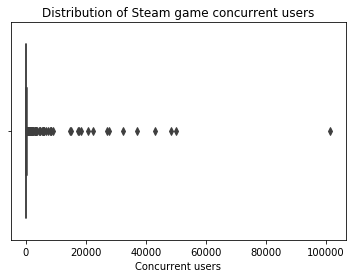

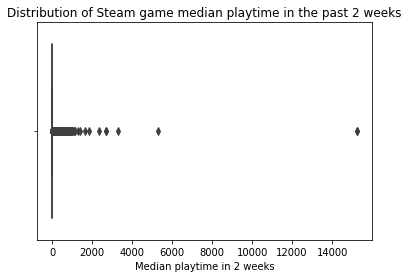

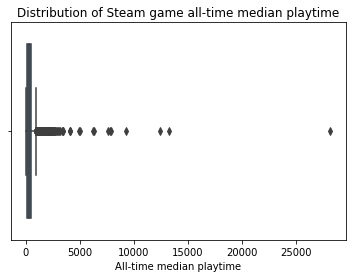

In [19]:
sns.boxplot(data=df, x="ccu")
plt.title("Distribution of Steam game concurrent users")
plt.xlabel("Concurrent users")
plt.show()

sns.boxplot(data=df, x="median_2weeks")
plt.title("Distribution of Steam game median playtime in the past 2 weeks")
plt.xlabel("Median playtime in 2 weeks")
plt.show()

sns.boxplot(data=df, x="median_forever")
plt.title("Distribution of Steam game all-time median playtime")
plt.xlabel("All-time median playtime")
plt.show()


I want to transform these variables such that the extreme positive values are drastically reduced, while the more common values are relatively unchanged.

To do this, I have opted to use a log transformation. Since there is data with values of 0 that would cause errors with the log, I have chosen to first shift the data by +1, as such:

In [20]:
%%capture [--no-display]

df["ccu_log"] = np.log(df["ccu"] + 1)
df["median_2weeks_log"] = np.log(df["median_2weeks"] + 1)
df["median_forever_log"] = np.log(df["median_forever"] + 1)

train, test = train_test_split(df, train_size=0.1, random_state=1096)


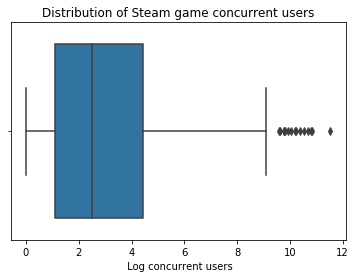

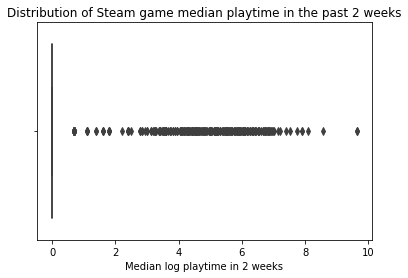

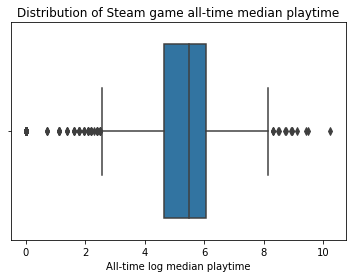

In [21]:
sns.boxplot(data=df, x="ccu_log")
plt.title("Distribution of Steam game concurrent users")
plt.xlabel(" Log concurrent users")
plt.show()

sns.boxplot(data=df, x="median_2weeks_log")
plt.title("Distribution of Steam game median playtime in the past 2 weeks")
plt.xlabel("Median log playtime in 2 weeks")
plt.show()

sns.boxplot(data=df, x="median_forever_log")
plt.title("Distribution of Steam game all-time median playtime")
plt.xlabel("All-time log median playtime")
plt.show()


But we should see which variables to transform and which not to. The adjusted r-squared value _is_ lower than the original model, but let's ignore that first. It turns out that transforming all three mentioned variables gives the highest adjusted r-squared value:

In [22]:
formula_1 = "ccu_log ~ owners + release_year + percentage_positive_reviews + median_forever + median_2weeks + is_multiplayer + is_indie"
formula_2 = "ccu_log ~ owners + release_year + percentage_positive_reviews + median_forever_log + median_2weeks + is_multiplayer + is_indie"
formula_3 = "ccu_log ~ owners + release_year + percentage_positive_reviews + median_forever + median_2weeks_log + is_multiplayer + is_indie"
formula_4 = "ccu_log ~ owners + release_year + percentage_positive_reviews + median_forever_log + median_2weeks_log + is_multiplayer + is_indie"

print("ccu_log against median_forever, median_2weeks and other variables: " + str(smf.ols(data=train, formula=formula_1).fit().rsquared_adj))
print("ccu_log against median_forever_log, median_2weeks and other variables: " + str(smf.ols(data=train, formula=formula_2).fit().rsquared_adj))
print("ccu_log against median_forever, median_2weeks_log and other variables: " + str(smf.ols(data=train, formula=formula_3).fit().rsquared_adj))
print("ccu_log against median_forever_log, median_2weeks_log and other variables: " + str(smf.ols(data=train, formula=formula_4).fit().rsquared_adj))


ccu_log against median_forever, median_2weeks and other variables: 0.5949810484446205
ccu_log against median_forever_log, median_2weeks and other variables: 0.6083596102213613
ccu_log against median_forever, median_2weeks_log and other variables: 0.6213182395329782
ccu_log against median_forever_log, median_2weeks_log and other variables: 0.6301672098500812


Now we fit the model using the transformed data.

This is much nicer already, most of the explanatory variables have extremely small p-values, meaning we can safely conclude that their slopes are non-zero (assuming inference conditions hold, which is to be seen later).

In [23]:
# Try again with log of variables
ols_log_formula = "ccu_log ~ owners + release_year + percentage_positive_reviews + median_forever_log + median_2weeks_log + is_multiplayer + is_indie"

ols_log_model = smf.ols(data=train, formula = ols_log_formula).fit()
ols_log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ccu_log   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     20.27
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.24e-25
Time:                        16:25:34   Log-Likelihood:                -252.10
No. Observations:                 148   AIC:                             532.2
Df Residuals:                     134   BIC:                             574.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -249.3690     77.146     -3.232      0.002    -401.950     -96.788
owners[T.200,000 - 500,000]             0.6191      0.283      2.186      0.031       0.059       1.179
owners[T.500,000 - 1,000,000]           1.2681      0.365      3.477      0.001       0.547       1.990
owners[T.1,000,000 - 2,000,000]         1.8378      0.496      3.705      0.000       0.857       2.819
owners[T.2,000,000 - 5,000,000]         0.9767      0.695      1.404      0.162      -0.399       2.352
owners[T.5,000,000 - 10,000,000]        1.9358      1.007      1.923      0.057      -0.055       3.927
owners[T.10,000,000 - 20,000,000]       3.3979      1.133      2.999      0.003       1.157       5.639
owners[T.20,000,000 - 50,000,000]       5.8514      1.511      3.874      0.000       2.864       8.839
owners[T.50,000,000 - 100,000,000]  -1.055e-15   2.66e-15     -0.396      0.693   -6.33e-15    4.22e-15
owners[T.100,000,000 - 200,000,000] -2.674e-16   4.24e-15     -0.063      0.950   -8.66e-15    8.12e-15
is_multiplayer[T.True]                  0.4099      0.262      1.567      0.119      -0.107       0.927
is_indie[T.True]                       -0.8222      0.251     -3.282      0.001      -1.318      -0.327
release_year                            0.1231      0.038      3.213      0.002       0.047       0.199
percentage_positive_reviews             3.0579      0.741      4.126      0.000       1.592       4.524
median_forever_log                      0.2307      0.077      2.996      0.003       0.078       0.383
median_2weeks_log                       0.3706      0.091      4.089      0.000       0.191       0.550
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.063
Skew:                           0.012   Prob(JB):                        0.969
Kurtosis:                       3.098   Cond. No.                     6.61e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 4.3 Discussion of the Model

#### 4.3.1 $R^2$ Value

The $R^2$ value of our model is 0.663. This means that roughly 66.3% of data in the dataset is explained by the model. I consider that not bad; more than half of variability of our response variables is explained by our model. It does still mean we should probably be cautious when making predictions using this model.

#### 4.3.2 Non-Zero Slopes

We can conclude with high confidence that the following explanatory variables have non-zero slopes:

* owners[T.500,000 - 1,000,000]
* owners[T.1,000,000 - 2,000,000]
* owners[T.10,000,000 - 20,000,000]
* owners[T.20,000,000 - 50,000,000]
* is_indie
* release_year
* percentage_positive_reviews
* median_forever_log
* median_2weeks_log

This is because they have extremely low p-values that we can safely conclude that their slopes are non-zero.

Conversely, for having p-values larger than 0.01, we could be suspicious that the following remaining variables have slopes close to or equals zero:

* owners[T.200,000 - 500,000]
* owners[T.2,000,000 - 5,000,000]
* owners[T.5,000,000 - 10,000,000]
* owners[T.50,000,000 - 100,000,000]
* owners[T.100,000,000 - 200,000,000]	
* is_multiplayer

#### 4.3.3 Linear Regression Equation

The corresponding linear regression equation is as such:

$\widehat{\log{\left(\text{Concurrent Users} + 1 \right)}} = -249.4 + 0.41 \text{ [is\_multiplayer]} - 0.82 \text{ [is\_indie]} + 3.1 \text{ [percentage\_positive\_reviews]} + 0.12 \text{ [release\_year]} + 0.23 \log{\left(\text{ [median\_forever] + 1}\right)}  + 0.37 \log{\left(\text{ [median\_2weeks] + 1}\right)} + 0.62 \text{ [200,000 - 500,000 owners]} + 1.3 \text{ [500,000 - 1,000,000 owners]} + 1.8 \text{ [1,000,000 - 2,000,000 owners]} + 0.98 \text{ [2,000,000 - 5,000,000 owners]} + 1.94 \text{ [5,000,000 - 10,000,000 owners]} + 3.4 \text{ [10,000,000 - 20,000,000 owners]} + 5.85 \text{ [20,000,000 - 50,000,000 owners]} - 2.7 \times 10^{-15} \text{ [50,000,000 - 100,000,000 owners]} - 2.7\times10^{-16} \text{ [100,000,000 - 200,000,000 owners]} $

<sup><sub>That was painful to type</sup></sub>

### 4.4 Predictive Ability

We should see how this model holds up against the test set. First, we see how it performs generally.

We can visualize how well it predicts values by plotting real values against predicted values. If a CCU value was predicted perfectly, the real and predicted value would be equal (ie. they would lie on the $y=x$ line).

We can also visualize its performance by plotting the distribution of errors, ie. the the distribution of the difference between predicted and actual values.

Overall, the model performs quite well! The points on the first graph do vary a bit around the $y=x$ line, but it does fit well around it. As for the error distribution, it centers very closely to 0, meaning the erros are most likely to be very small.

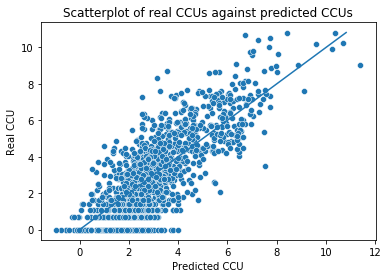

Mean error: 0.05495174616303576


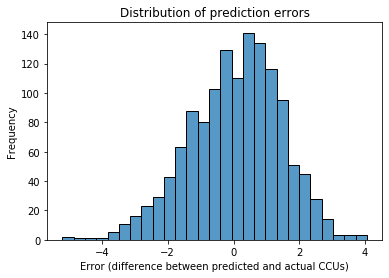

In [24]:
y_predict = ols_log_model.predict(test)
y_real = test["ccu_log"]

sns.scatterplot(x=y_predict, y=y_real)
plt.plot([0, max(y_real)], [0, max(y_real)])
plt.title("Scatterplot of real CCUs against predicted CCUs")
plt.ylabel("Real CCU")
plt.xlabel("Predicted CCU")
plt.show()

error = y_predict - y_real
sns.histplot(x=error)
plt.title("Distribution of prediction errors")
plt.ylabel("Frequency")
plt.xlabel("Error (difference between predicted and actual CCUs)")

print("Mean error: " + str(error.mean()))

plt.show()


We can see how the model performs for specific games. I'll choose five games that I like that happen to be in the dataset, which have distinct CCUs. 

In [25]:
fav_games = df[(df["name"] == "Sid Meier's Civilization V")
               | (df["name"] == "Terraria")
               | (df["name"] == "OneShot")
               | (df["name"] == "Borderlands 2")
               | (df["name"] == "Just Shapes & Beats")]
fav_games = fav_games.sort_values("ccu", ascending=False)

# Quick summary
fav_games[["name", "developer", "owners", "ccu"]]

,name,developer,owners,ccu
148,Terraria,Re-Logic,"20,000,000 - 50,000,000",48257
738,Sid Meier's Civilization V,"Firaxis Games, Aspyr (Mac), Aspyr (Linux)","5,000,000 - 10,000,000",18425
472,Borderlands 2,"Gearbox Software, Aspyr (Mac), Aspyr (Linux)","10,000,000 - 20,000,000",3361
1299,OneShot,Future Cat LLC,"500,000 - 1,000,000",126
1450,Just Shapes & Beats,Berzerk Studio,"500,000 - 1,000,000",121


We would expect that, if we transformed the logged predicted values back into unlogged CCUs, their variance from the real values would be much greater.

First we compare the logged CCU values between real and predicted. Then, we compare those values transformed back into proper CCU. We can then measure the difference and percentage difference (errors) between predicted and real.

Though the quantity of error increases for predictions of games with higher CCUs, the _percentage difference_ decreases. Percentage-wise, the model is typically more accurate at predicting for games with high real CCUs.

In [26]:
# Summarise the results in a dataframe

results = pd.DataFrame({
                "real_ccu_log" : fav_games["ccu_log"].to_numpy(),
                "predicted_ccu_log" : ols_log_model.predict(fav_games).to_numpy(),
                "real_ccu" : fav_games["ccu"].to_numpy(),
                "predicted_ccu" : np.e ** (ols_log_model.predict(fav_games).to_numpy()) - 1
            }, index=fav_games["name"].to_numpy())

results["error"] = np.abs(results["predicted_ccu"] - results["real_ccu"])

results["percentage_error"] = round(results["error"] / results["real_ccu"] * 100, 1)
results["percentage_error"] = [(str(i) + "%") for i in results["percentage_error"].to_numpy()]


print("'ccu' stands for concurrent users, 'log' means the data went through a logarithm transformation")
results.head()

'ccu' stands for concurrent users, 'log' means the data went through a logarithm transformation


,real_ccu_log,predicted_ccu_log,real_ccu,predicted_ccu,error,percentage_error
Terraria,10.784317,10.380700,48257,32230.526842,16026.473158,33.2%
Sid Meier's Civilization V,9.821518,8.384677,18425,4378.442470,14046.557530,76.2%
Borderlands 2,8.120291,8.486470,3361,4847.717605,1486.717605,44.2%
OneShot,4.844187,5.859866,126,349.677262,223.677262,177.5%
Just Shapes & Beats,4.804021,6.241859,121,512.812721,391.812721,323.8%


#### 4.4 Multiple Linear Regression Conditions for Inference

##### 4.4.1 Linearity Condition
Residuals are equally distributed around the line, so this condition is met.

##### 4.4.2 Constant Variance of Residuals
Variance of residuals increase slightly from left to middle, but stabilize afterwards. This condition is not fully met.

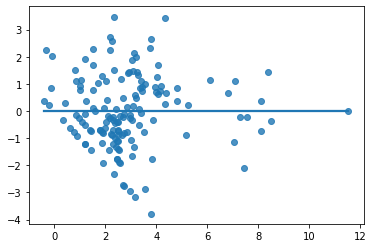

In [27]:
sns.regplot(x=ols_log_model.fittedvalues, y=ols_log_model.resid, ci=None)


##### 4.4.3 Residuals are Normally Distributed

The residuals follow a roughly normal curve around 0, this condition is met.

Mean residuals: -6.420997367440362e-13


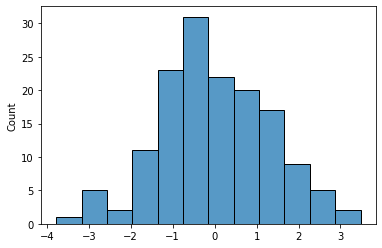

In [28]:
print("Mean residuals: " + str(np.mean(ols_log_model.resid)))
sns.histplot(x=ols_log_model.resid)


##### 4.4.4 Residuals are Independent

The dataset consists of a random sample of 1500 games on Steam. There are well-over tens of thousands of games on Steam, so $n_\text{sample} < 10\% \times n_\text{population}$. The condition is met.

##### 4.4.5 Multicollinearity Condition

`release_year ~ is_indie` have arguably somewhat high correlation at near 0.5, while a few others range around 0.3 correlation. Hence, there exists some collinearity, so this condition is somewhat not met either.

**Overall, the results acquired in this section should be approached with some caution, as not all the inference conditions are perfectly met.**

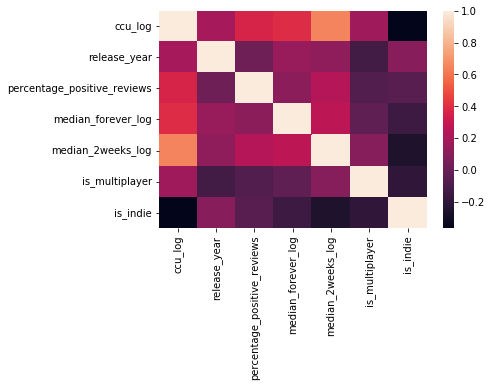

In [29]:
correlations = train[['ccu_log',
                    'owners',
                    'release_year',
                    'percentage_positive_reviews',
                    'median_forever_log',
                    'median_2weeks_log',
                    'is_multiplayer',
                    'is_indie']].corr()

sns.heatmap(correlations)


C:\Users\Vuc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\Vuc\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

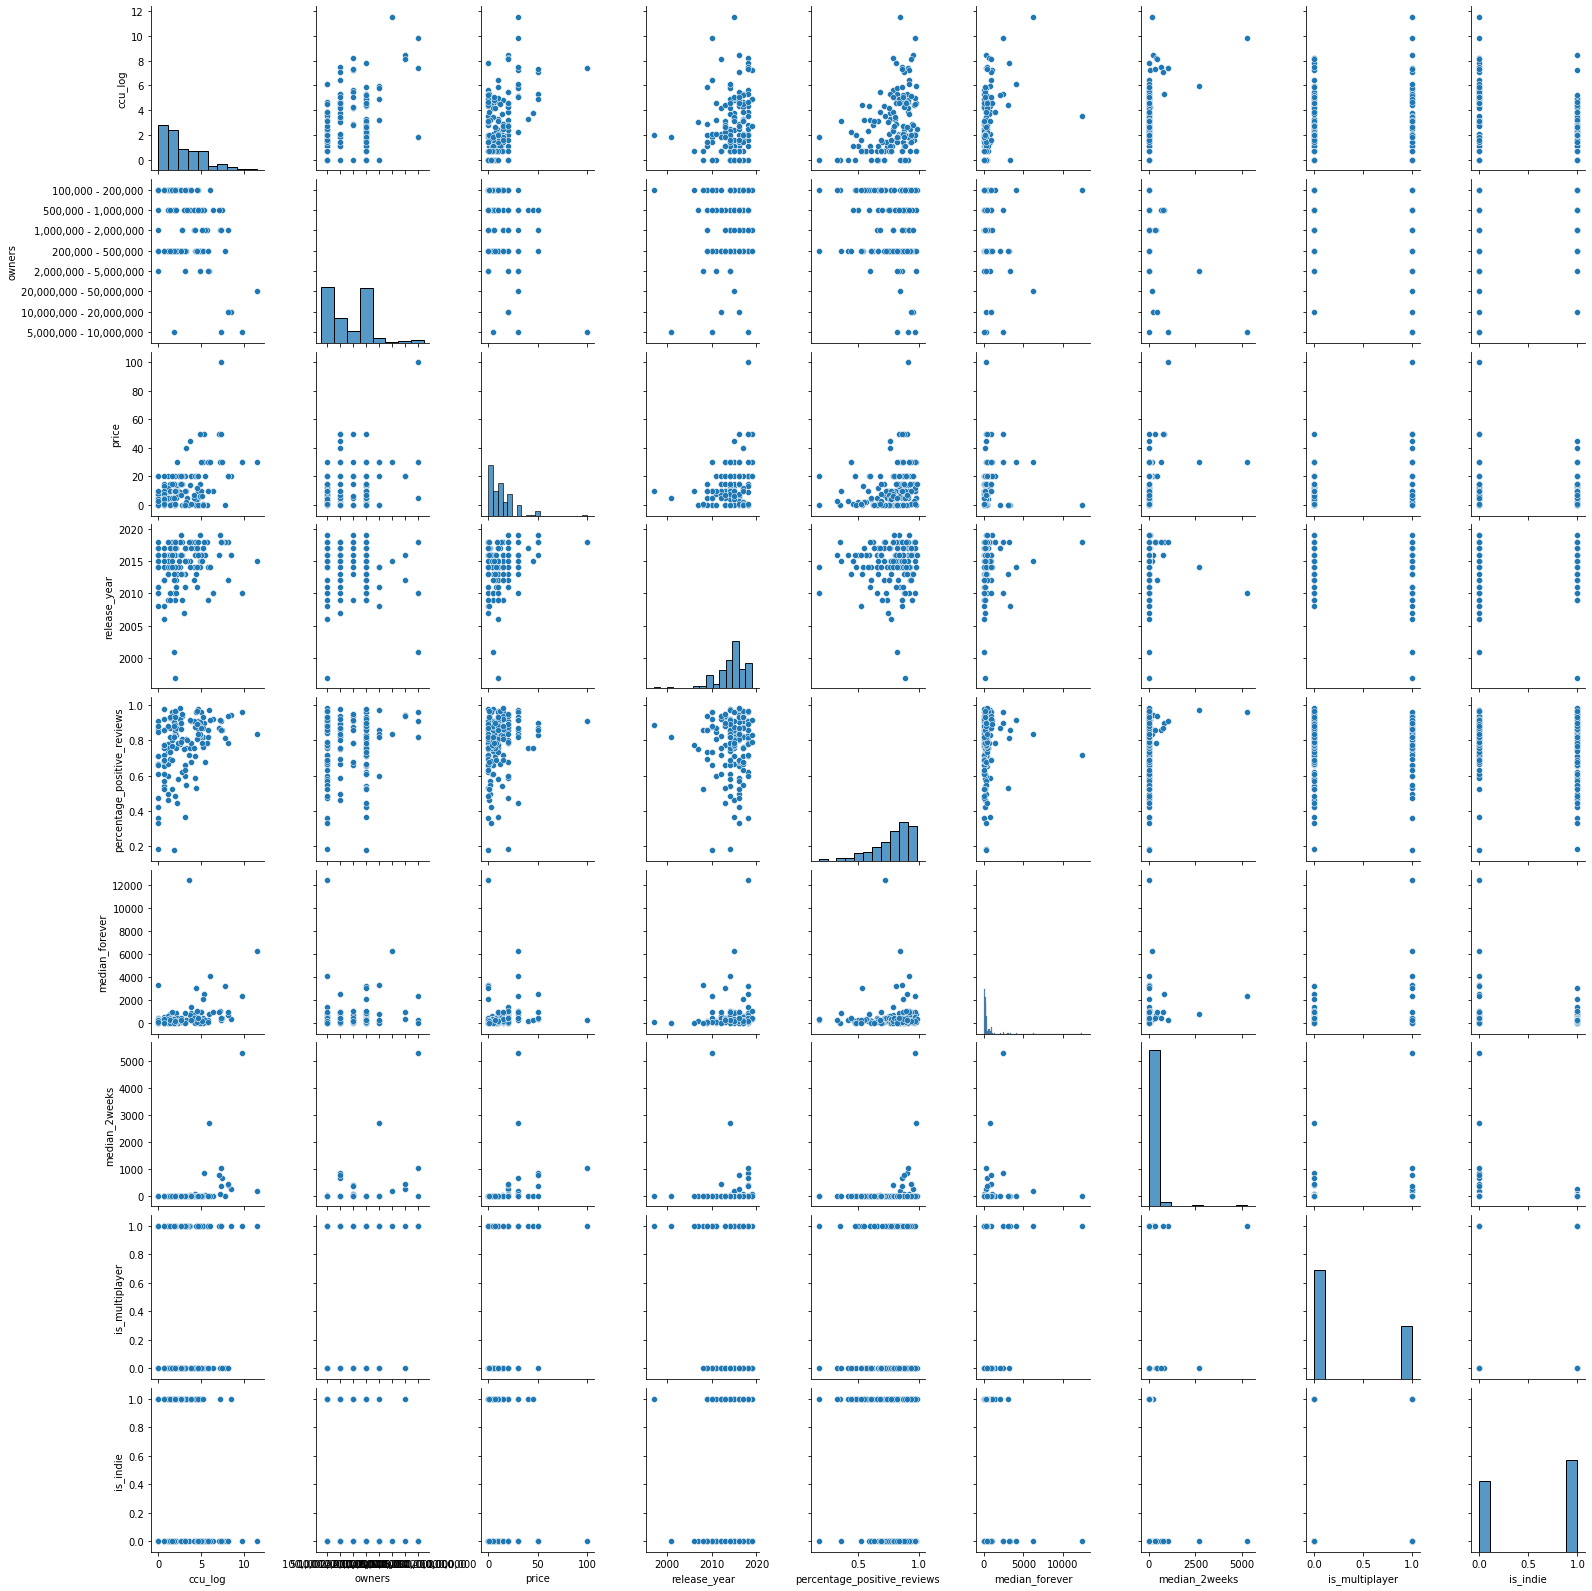

In [30]:
train["owners"] = train["owners"].to_numpy()
sns.pairplot(data=train, vars=['ccu_log',
                               'owners',
                               'price',
                               'release_year',
                               'percentage_positive_reviews',
                               'median_forever',
                               'median_2weeks',
                               'is_multiplayer',
                               'is_indie'])
train["owners"] = pd.Categorical(train["owners"], owner_order)


### 4.5 Conclusion: (Multiple) Linear Regression

#### 4.5.1 In the Dataset

We have produced a multiple linear regression model that uses the data about Steam games to predict its CCU (short for concurrent users). We have used transformation by log to produce a better fit, and ended up with a model that predicts games' CCUs surprisingly well. Still, not all the conditions are met for making inferences about the model, so all inferences made regarding the model should be taken with caution.

#### 4.5.2 The population: All PC Games

From this sample of 1500 Steam games we have established a notable relationship between a game's concurrent users and multiple variables. If this relationship exists for the dataset, then very likely it also holds for all games ever published.

## 5. Logistic Regression

### 5.1 Introduction

Another point of data we could look more into is whether a Steam game is positively reviewed or not. The game's price, the game's classifications, and the game's playtime may hint towards how people perceive a game.

### 5.2 Setup

Similar to in 3., we will use the same thresholds to determine which games are considered negatively-reviewed, starting at Mixed and under (so, 69% positive reviews and below)

In [31]:
df["is_negatively_reviewed"] = df["percentage_positive_reviews"] <= 0.69
df["is_negatively_reviewed"] = df["is_negatively_reviewed"].map({True: 1, False: 0})

train, test = train_test_split(df, train_size=0.1, random_state=1096)

df[["name", "is_negatively_reviewed"]].head()


,name,is_negatively_reviewed
0,The Adventure Pals,0
1,Command & Conquer 4: Tiberian Twilight,1
2,SNOW - The Ultimate Edition,1
3,Back to Bed,0
4,Dude Simulator 2,1


It should be noted that, despite the high threshold for a game to be considered positively-reviewed, most of the games in the dataset are still positively-reviewed.

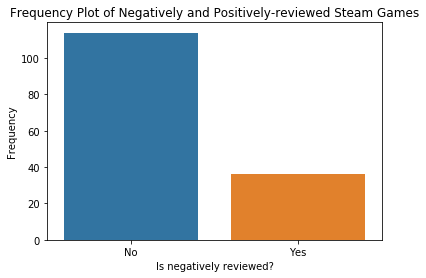

In [32]:
sns.countplot(x=train["is_negatively_reviewed"])
plt.title("Frequency Plot of Negatively and Positively-reviewed Steam Games")
plt.ylabel("Frequency")
plt.xlabel("Is negatively reviewed?")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

Next we fit the first logistic regression model. With knowledge from the previous section, it is probably wise to start off with using the transformed versions of the CCU and median playtime variables.

In [33]:
# Owners was originally in the initial set of variables
# But the model would give out errors unless I removed it
# RIP

logit_formula = """is_negatively_reviewed ~
                median_forever_log +
                median_2weeks_log +
                price +
                ccu_log +
                is_multiplayer +
                is_indie"""
                
logit_model = smf.logit(data=train, formula = logit_formula).fit()
logit_model.summary()


Optimization terminated successfully.
         Current function value: 0.474294
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     is_negatively_reviewed   No. Observations:                  150
Model:                              Logit   Df Residuals:                      143
Method:                               MLE   Df Model:                            6
Date:                    Wed, 08 Dec 2021   Pseudo R-squ.:                  0.1393
Time:                            16:25:56   Log-Likelihood:                -71.144
converged:                           True   LL-Null:                       -82.662
Covariance Type:                nonrobust   LLR p-value:                 0.0007846
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6412      0.812     -0.790      0.429      -2.232       0.949
is_multiplayer[T.True]     0.3331      0.461      0.722      0.470      -0.571       1.237
is_indie[T.True]           0.5227      0.459      1.139      0.255      -0.377       1.422
median_forever_log         0.0785      0.131      0.598      0.550      -0.179       0.336
median_2weeks_log          0.1177      0.310      0.379      0.705      -0.491       0.726
price                     -0.0446      0.029     -1.518      0.129      -0.102       0.013
ccu_log                   -0.4268      0.150     -2.852      0.004      -0.720      -0.133
==========================================================================================
"""

### 5.3 Parsimoniousness
#### 5.3.1 Backwards Elimination

We will use backwards elimination, using BIC, to find the most parsimonious logistic regression model. The function below will run through all possible removals and print which gives the biggest reduction in BIC.

In [34]:
def backwards_elim_bic(vars, initial_bic, iter = 1):
    lowest_bic = initial_bic
    removed_feature = "None"
    print("Iteration " + str(iter))
    
    for i in range(len(vars)):

        # Create a set of variables that exclude the i-th explanatory variable and create a formula from that
        test_vars = [vars[j] for j in range(len(vars)) if j != i]
        test_formula = "is_positively_reviewed ~ " + (" + ".join(test_vars))

        # Fit the model to that formula and get the adjusted r-squared value
        test_model = smf.ols(data=train, formula=test_formula).fit()
        test_bic = test_model.bic

        print("By removing " + vars[i] + ", BIC = " + str(test_bic))
        
        # If the adjusted r-squared value is greater than the current largest, then replace it
        if test_bic < lowest_bic:
            removed_feature = vars[i]
            lowest_bic = test_bic

    # Print the resulting variable to remove
    print("Initial BIC  = " + str(initial_bic) + "\nLowest BIC = " +
          str(lowest_bic) + " achieved by removing " + removed_feature)
    
      # Recursively run until adjusted R squared does not increase
    if removed_feature != "None":
        
        resultant_vars = [i for i in vars if i != removed_feature]
        
        if len(resultant_vars) == 1:
            print("Left with one variable (" + resultant_vars[0] + "), algorithm halted")
        else:
            backwards_elim_bic(resultant_vars, lowest_bic, iter + 1)


In [35]:
vars = ["median_forever_log",
        "median_2weeks_log",
        "price",
        "ccu_log",
        "is_multiplayer",
        "is_indie"]
initial_bic = logit_model.bic

backwards_elim_bic(vars, initial_bic)


Iteration 1
By removing median_forever_log, BIC = 180.66785411637497
By removing median_2weeks_log, BIC = 181.85901030775332
By removing price, BIC = 182.3274832757041
By removing ccu_log, BIC = 190.12170596335952
By removing is_multiplayer, BIC = 181.29178237910182
By removing is_indie, BIC = 181.07108402429483
Initial BIC  = 177.36278836338792
Lowest BIC = 177.36278836338792 achieved by removing None


<sub><sup>bruh.</sup></sub>

We find that our model is as parsimonious as can be. We proceed with the model we already have, accepting it as the most parsimonious.



#### 5.3.2 Final Logistic Regression

It's the same as earlier, due to reasons discussed above.

In [36]:
logit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     is_negatively_reviewed   No. Observations:                  150
Model:                              Logit   Df Residuals:                      143
Method:                               MLE   Df Model:                            6
Date:                    Wed, 08 Dec 2021   Pseudo R-squ.:                  0.1393
Time:                            16:25:56   Log-Likelihood:                -71.144
converged:                           True   LL-Null:                       -82.662
Covariance Type:                nonrobust   LLR p-value:                 0.0007846
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6412      0.812     -0.790      0.429      -2.232       0.949
is_multiplayer[T.True]     0.3331      0.461      0.722      0.470      -0.571       1.237
is_indie[T.True]           0.5227      0.459      1.139      0.255      -0.377       1.422
median_forever_log         0.0785      0.131      0.598      0.550      -0.179       0.336
median_2weeks_log          0.1177      0.310      0.379      0.705      -0.491       0.726
price                     -0.0446      0.029     -1.518      0.129      -0.102       0.013
ccu_log                   -0.4268      0.150     -2.852      0.004      -0.720      -0.133
==========================================================================================
"""

### 5.4 Discussion
#### 5.4.1 Non-Zero slopes

It is difficult to conclude that many of these slopes are non-zero. The only explanatory variable with a definitely small p-value is `ccu-log` and maybe `price`. I would be suspicious of the rest. Because of this, it is possible that the explanatory variables for this model were mostly poorly-chosen.

#### 5.4.2 Logistic Regression Equation

$\log{(\text{Odds a Steam Game is Negatively Reviewed})}$

### 5.5 Effectiveness Review (ROC and AUC)

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [38]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc, 3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


C:\Users\Vuc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


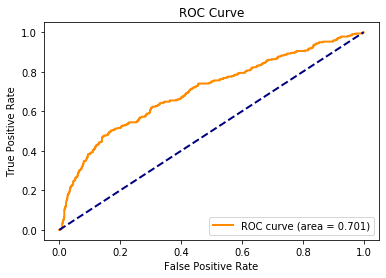

In [39]:
p_hat_test = logit_model.predict(test)
test["p_hat_test"] = p_hat_test

fprs, tprs, thresholds = roc_curve(
    y_true=test['is_negatively_reviewed'],
    y_score=test['p_hat_test'])
auc = roc_auc_score(
    y_true=test['is_negatively_reviewed'],
    y_score=test['p_hat_test'])

plot_roc(fprs, tprs, auc)


### 5.6 Probability Threshold

The original goal was to be able to predict whether or not a game would be negatively-reviewed or not, in order to avoid bad games. We would like a threshold such that the model often correctly predicts negatively-reviewed games (High True Positive Rate), and does not falsely label positively-reviewed games as negative (Low False Positive Rate).

We can see from the above ROC and AUC that there exists a threshold where we can get decent True Positive Rate of around 0.5 at a False Positive Rate of around 0.2. We can find it using the following:

In [40]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold': [thresh],
                         'tpr': [tpr],
                         'fpr': [fpr]})

# Shortening the range for clarity

for thresh in np.arange(0.3, 0.4, .01):
    print(tpr_fpr_thresh(test['is_negatively_reviewed'], test['p_hat_test'], thresh))


   threshold      tpr       fpr
0        0.3  0.56962  0.270793
   threshold       tpr       fpr
0       0.31  0.556962  0.261122
   threshold       tpr       fpr
0       0.32  0.544304  0.245648
   threshold       tpr       fpr
0       0.33  0.544304  0.231141
   threshold      tpr       fpr
0       0.34  0.53481  0.222437
   threshold       tpr       fpr
0       0.35  0.525316  0.205996
   threshold       tpr       fpr
0       0.36  0.506329  0.180851
   threshold       tpr       fpr
0       0.37  0.496835  0.167311
   threshold       tpr      fpr
0       0.38  0.481013  0.15764
   threshold       tpr       fpr
0       0.39  0.455696  0.140232
   threshold       tpr      fpr
0        0.4  0.433544  0.12766


If we wanted to use this model to decently predict negatively-reviewed games while minimizing the number of good games labelled as negative, we would use a threshold of around $p=0.36$ which gives us a $TPR = 0.506$ and $FPR = 0.181$

We can use this threshold 

In [41]:
%%capture [--no-display]
test["pred_negatively_reviewed"] = logit_model.predict(test) <= 0.36
test["pred_negatively_reviewed"] = test["pred_negatively_reviewed"].map({True: 1, False: 0 })


In [42]:
test[["name", "is_negatively_reviewed", "pred_negatively_reviewed"]].head()


,name,is_negatively_reviewed,pred_negatively_reviewed
454,The Search,0,0
1179,Cat Burglar: A Tail of Purrsuit,0,0
362,8BitMMO,1,0
1203,Hell Yeah! Wrath of the Dead Rabbit,0,1
769,Citalis,1,0


In [44]:
tpr_test = np.mean((test["pred_negatively_reviewed"]
                   == 1) & (test["is_negatively_reviewed"] == 1))

fpr_test = np.mean((test["pred_negatively_reviewed"]
                   == 1) & (test["is_negatively_reviewed"] == 0))

tnr_test = np.mean((test["pred_negatively_reviewed"]
                    == 0) & (test["is_negatively_reviewed"] == 0))

fnr_test = np.mean((test["pred_negatively_reviewed"]
                   == 0) & (test["is_negatively_reviewed"] == 1))

tpr_test, fpr_test


(0.11555555555555555, 0.6274074074074074)

That is quite bad.

### 5.7 Conclusion: Logistic Regression

#### 5.7.1 Within the Dataset

It seems that there is a weak relationship, between whether a game is negatively-reviewed and its median playtimes, price, log concurrent users, and whether it's a multiplayer and/or indie game. Perhaps by adding more variables, such as game genres, number of owners and release date, the fit of our model would improve.

It seems likely that there is rather a stronger relationship between whether a game is _positively_-reviewed and the mentioned variables.

#### 5.7.2 The population: All PC Games

From our sample of 1500 Steam games we have established a weak relationship between negatively-reviewed games and the mentioned variables. Therefore this relationship likely also does not hold or holds weakly **for all PC Games**. Again, it is possible that the relationship is stronger for positively-reviewed games.

## 6. Conclusion

We have used descriptive analytics to visualize the difference in concurrent players of indie and non-indie multiplayer games as well as indie and non-indie singleplayer games, and found that a difference does exist (games have higher concurrent users if they are either or both multiplayer & non-indie).

We have used inference & hypothesis testing to establish that there exists a differnece in how positively-reviewed free-to-play games and paid games are.

We have used a multiple linear regression model to establish that the number of concurrent users a game has is possibly related to their owner count, release date, percentage of positive reviews, median playtimes (both within 2 weeks and all-time), whether they are multiplayer, and whether that game is indie.

Finally, using a logistic regression model, we failed to find a relationship between whether a game is negatively-reviewed or not based on their multiplayer & indie status, median playtime(s), price, and concurrent users. A relationship may exist within other variables not used in this research.